In [1]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.linalg import svd


C:\Users\jambo\AppData\Local\Temp\ipykernel_8128\4060678475.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#loading of the dataset
#filepath
path = 'data.csv'
#reading of the data
original_data = pd.read_csv(path, header=0)
#printing a few examples of the data
print(original_data.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [3]:
# Standardize the features to fit the reauired format
feature_names = original_data.columns

scaler = StandardScaler()
numeric_data = scaler.fit_transform(original_data)
# Subtract mean value from data
Y = numeric_data - numeric_data.mean(axis=0)

# PCA by computing SVD of Y
U, S, V = svd(Y, full_matrices=False)

# Compute variance explained by principal components
rho = (S * S) / np.sum(S * S)

# Plot variance explained
threshold = 0.9
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.tight_layout()
plt.show()

for i in range(len(feature_names)):
    print(f"PC{i+1}: {feature_names[i]}")


ValueError: could not convert string to float: '2014-05-02 00:00:00'

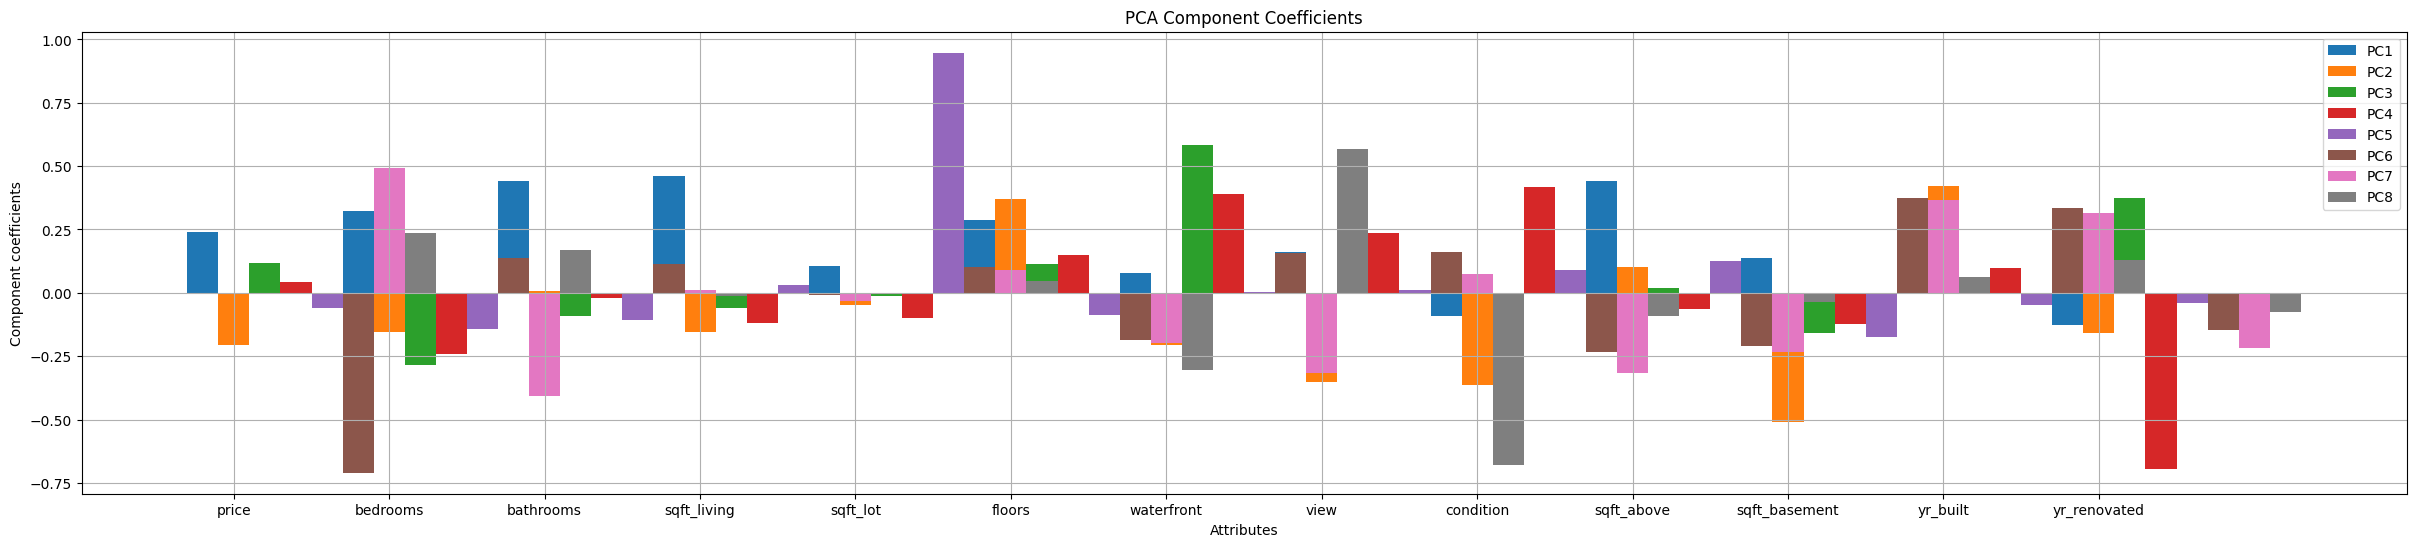

In [ ]:
#maybe not correct
N, M = numeric_data.shape
Y = numeric_data - np.ones((N, 1)) * numeric_data.mean(0)
U, S, Vh = svd(Y, full_matrices=False)
V = Vh.T


pcs = [0, 1, 2,3,4,5,6,7]
legendStrs = ["PC" + str(e + 1) for e in pcs]
c = ["r", "g", "b"]
bw = 0.2
plt.figure(figsize=(30, 6))
r = np.arange(1, M + 1)
for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)

plt.xticks(r + bw, feature_names)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("PCA Component Coefficients")
plt.show()

PCA Component 1: Explained Variance Ratio = 0.30, Cumulative Explained Variance = 0.30
PCA Component 2: Explained Variance Ratio = 0.16, Cumulative Explained Variance = 0.46
PCA Component 3: Explained Variance Ratio = 0.10, Cumulative Explained Variance = 0.56
PCA Component 4: Explained Variance Ratio = 0.09, Cumulative Explained Variance = 0.64
PCA Component 5: Explained Variance Ratio = 0.08, Cumulative Explained Variance = 0.72
PCA Component 6: Explained Variance Ratio = 0.07, Cumulative Explained Variance = 0.79
PCA Component 7: Explained Variance Ratio = 0.05, Cumulative Explained Variance = 0.84
PCA Component 8: Explained Variance Ratio = 0.05, Cumulative Explained Variance = 0.89
PCA Component 9: Explained Variance Ratio = 0.03, Cumulative Explained Variance = 0.92
PCA Component 10: Explained Variance Ratio = 0.03, Cumulative Explained Variance = 0.95
PCA Component 11: Explained Variance Ratio = 0.03, Cumulative Explained Variance = 0.98
PCA Component 12: Explained Variance Rati

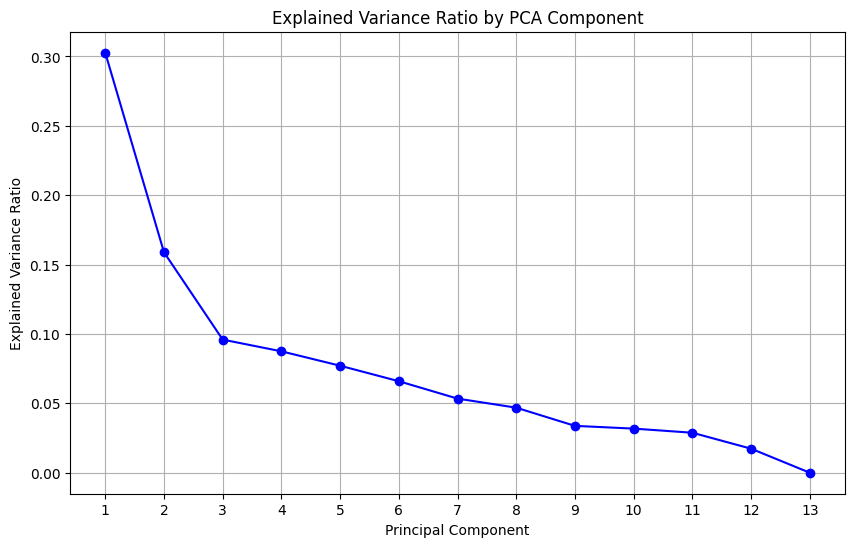

In [ ]:
# Extract features for PCA
features = original_data.drop(columns=['date', 'street', 'city', 'statezip', 'country'])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA()
pca.fit(scaled_features)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print the explained variance ratio and cumulative explained variance
for i, ev in enumerate(explained_variance_ratio):
    print(f"PCA Component {i+1}: Explained Variance Ratio = {ev:.2f}, Cumulative Explained Variance = {cumulative_explained_variance[i]:.2f}")

# Principal directions (eigenvectors)
principal_directions = pca.components_

# Data projection onto principal components
data_projected = pca.transform(scaled_features)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Explained Variance Ratio by PCA Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()


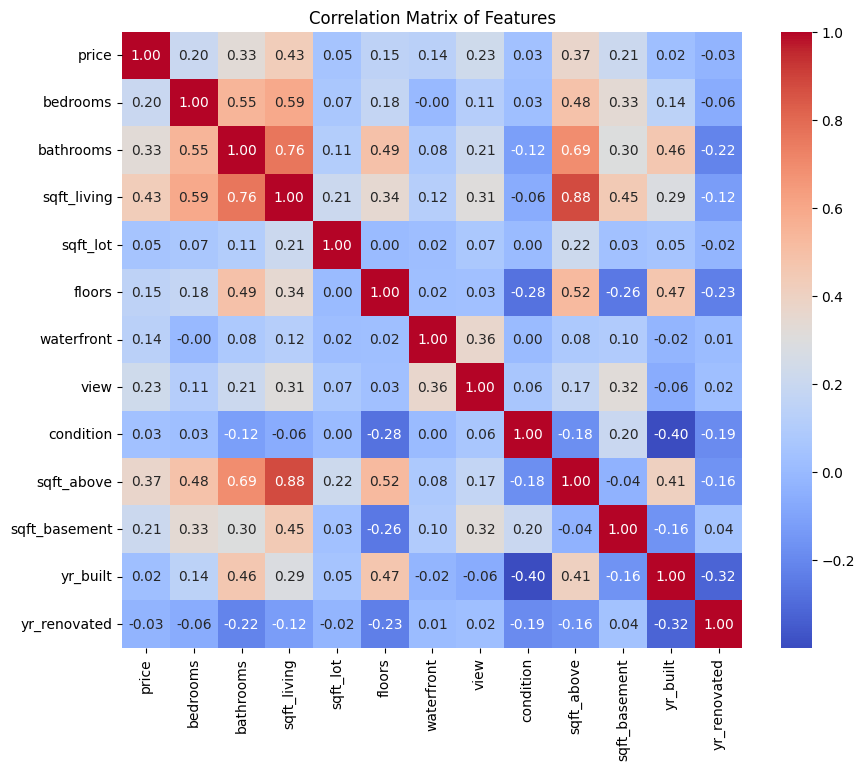

In [ ]:
# Calculate the correlation matrix
correlation_matrix = features.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

C:\Users\jambo\AppData\Local\Temp\ipykernel_3492\2073271442.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=original_data, palette='Greys')
C:\Users\jambo\AppData\Local\Temp\ipykernel_3492\2073271442.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=original_data, palette='Greys')
C:\Users\jambo\AppData\Local\Temp\ipykernel_3492\2073271442.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=original_data, palette='Greys')
C:\Users\jambo\AppData\Local\Temp\ipykernel_3492\2073271442.p

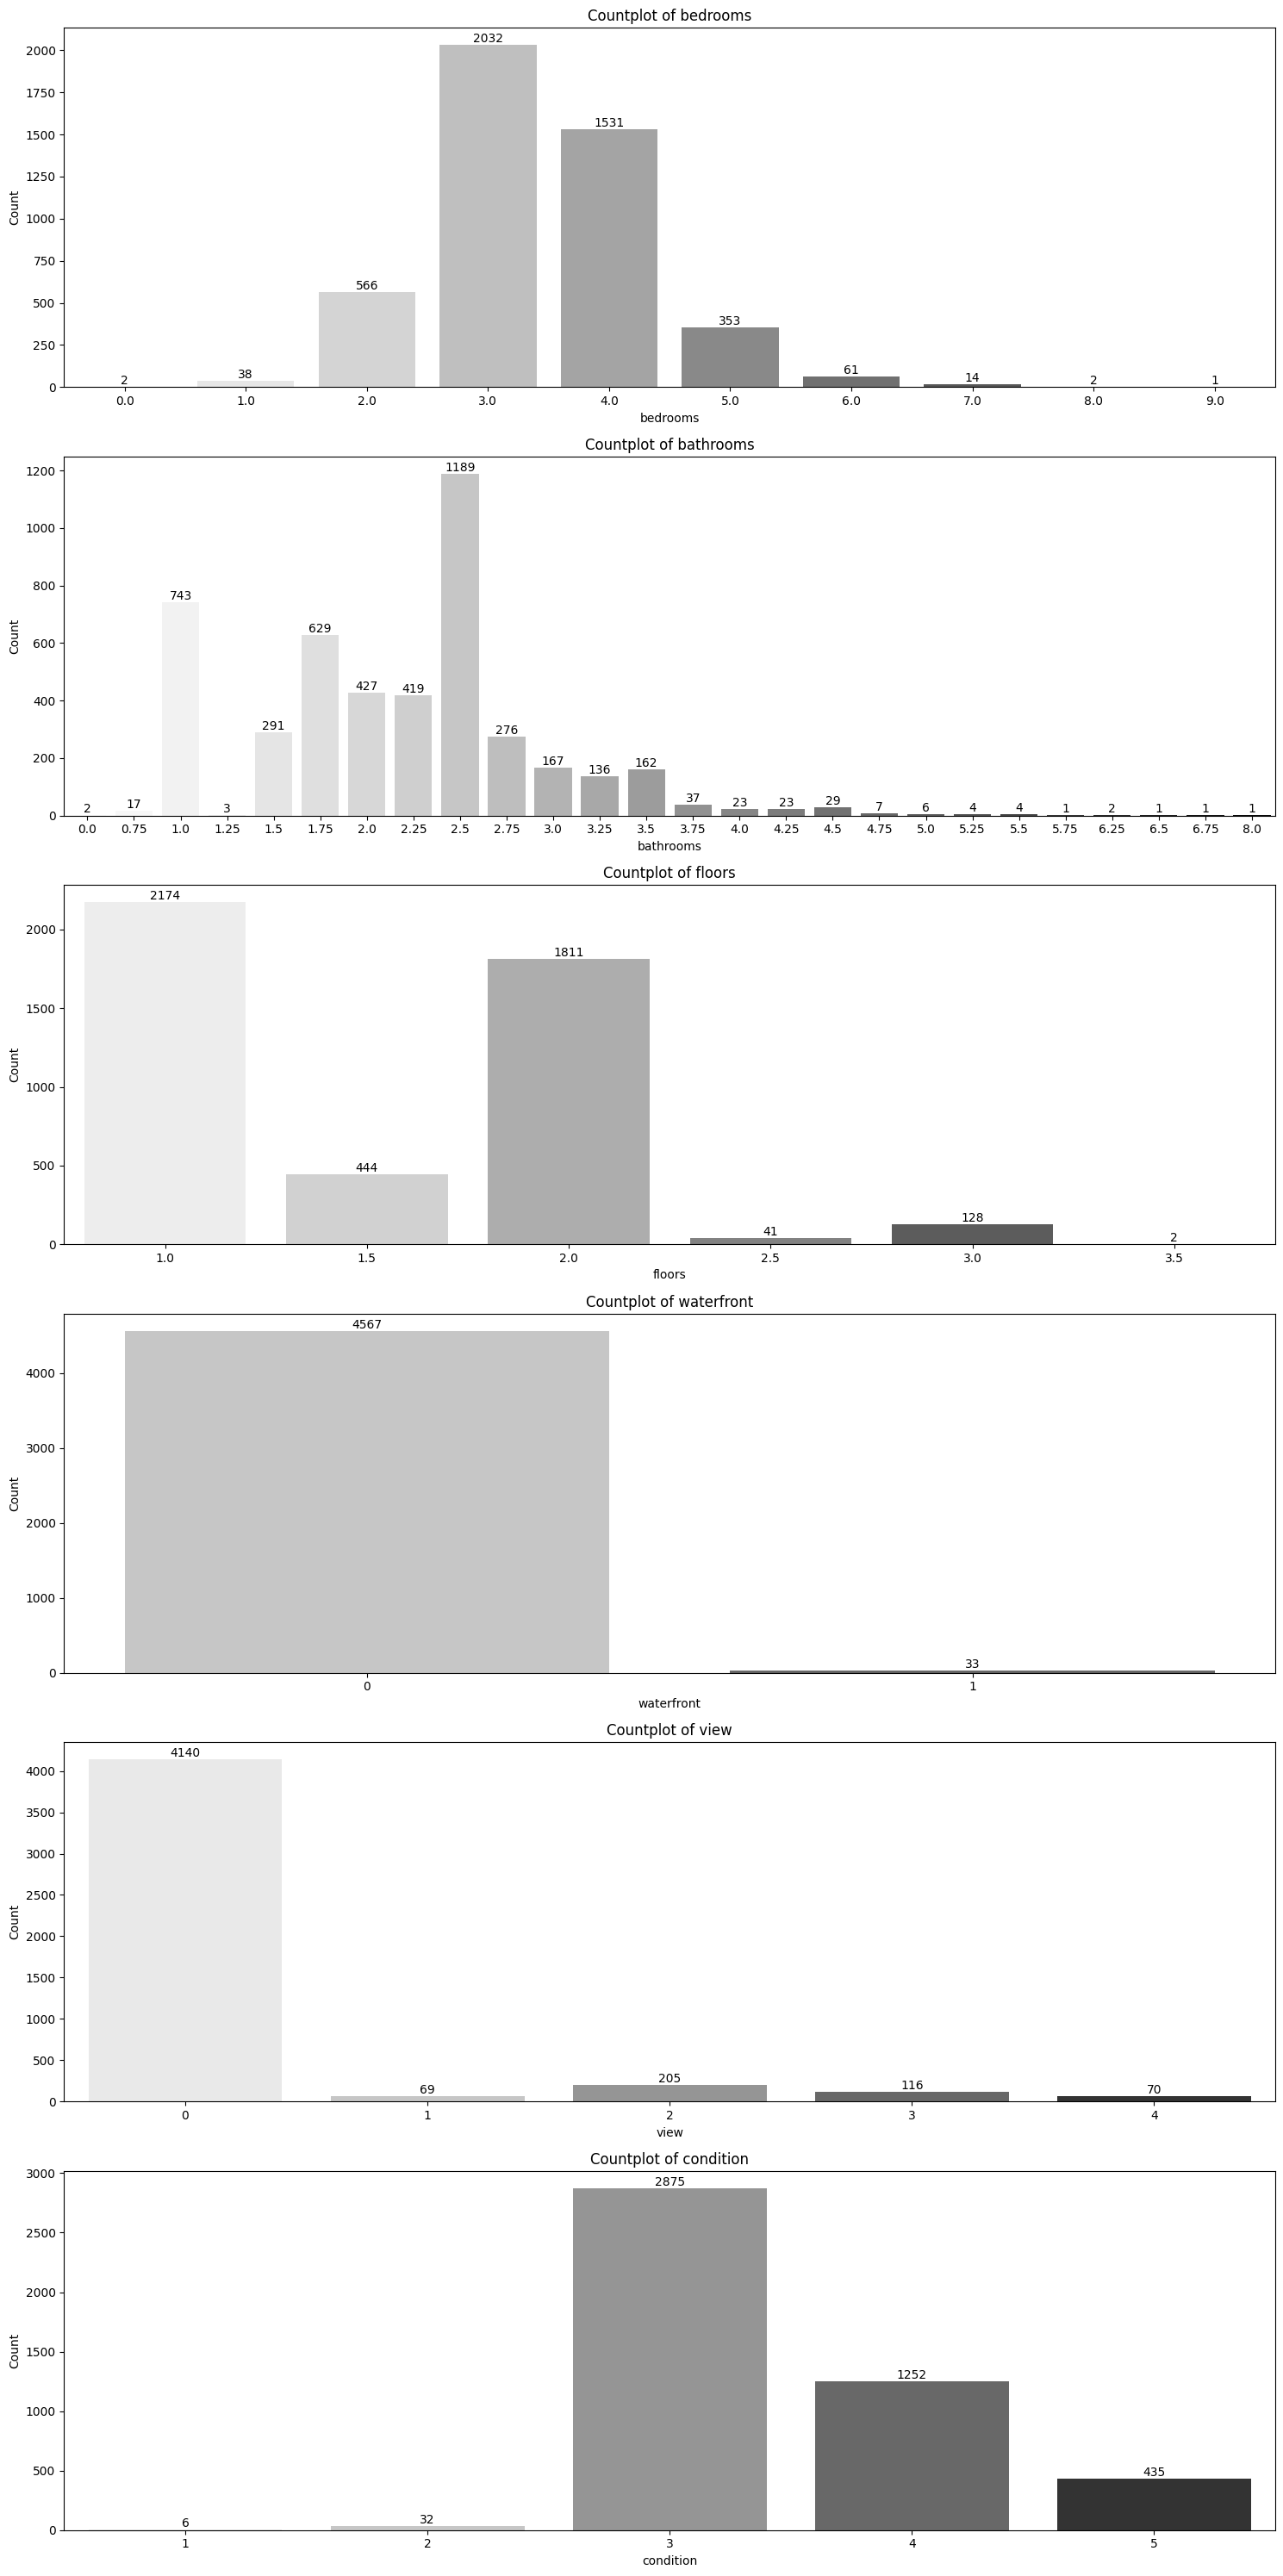

In [ ]:
#plot feature counts
categorical_features = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition']

plt.figure(figsize=(15, 30)) 
for i, feature in enumerate(categorical_features, start=1):
    plt.subplot(len(categorical_features), 1, i)
    sns.countplot(x=feature, data=original_data, palette='Greys')
    plt.title(f'Countplot of {feature}')
    plt.ylabel('Count')
    
    for bar in plt.gca().patches:
        plt.gca().annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                           ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()


From looking at the features available, there are some that will not be used as they don't provide information that can be used for either our regression or classification problem.
These are removed below.

In [ ]:
columns_to_remove = {'date','street','statezip','country'}
original_data = original_data.drop(columns=columns_to_remove)
print(original_data.head())
print("Number of rows orignally: {}".format(original_data.shape[0]))

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0       3.0       1.50         1340      7912     1.5           0   
1  2384000.0       5.0       2.50         3650      9050     2.0           0   
2   342000.0       3.0       2.00         1930     11947     1.0           0   
3   420000.0       3.0       2.25         2000      8030     1.0           0   
4   550000.0       4.0       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3        1340              0      1955          2005   
1     4          5        3370            280      1921             0   
2     0          4        1930              0      1966             0   
3     0          4        1000           1000      1963             0   
4     0          4        1140            800      1976          1992   

        city  
0  Shoreline  
1    Seattle  
2       Kent  
3   Bellevue  
4    

In [ ]:
#we are not interested in the sqft of the basement, rather if it has a basement or not so I convert them into 0 or 1 making it categorical
original_data['has_basement'] = original_data['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
original_data = original_data.drop(columns='sqft_basement')

In [ ]:
#checking what are some distinct values in each column
distinct_values = {
    'View': original_data['view'].value_counts(),
    'Condition': original_data['condition'].value_counts(),
    'Waterfront': original_data['waterfront'].value_counts(),
    'Bathrooms': original_data['bathrooms'].value_counts(),
    'Bedrooms': original_data['bedrooms'].value_counts(),
    'Floors': original_data['floors'].value_counts()
}

# Print distinct values for each column
for column, values in distinct_values.items():
    print(f"Distinct values for {column}:")
    print(values)
    print()

Distinct values for View:
view
0    4140
2     205
3     116
4      70
1      69
Name: count, dtype: int64

Distinct values for Condition:
condition
3    2875
4    1252
5     435
2      32
1       6
Name: count, dtype: int64

Distinct values for Waterfront:
waterfront
0    4567
1      33
Name: count, dtype: int64

Distinct values for Bathrooms:
bathrooms
2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: count, dtype: int64

Distinct values for Bedrooms:
bedrooms
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: count, dtype: int64

Distinct values for Floors:
floors
1.0    2174
2.0    1811
1.5     444
3.0     128
2.5      

In [ ]:
#checking for null values for the features that it does not make sense and removing them
print("Number of 0 values in price: {}".format(len(original_data[original_data['price']==0])))
print("Number of 0 values in bedrooms: {}".format(len(original_data[original_data['bedrooms']==0])))
print("Number of 0 values in bathrooms: {}".format(len(original_data[original_data['bathrooms']==0])))
print("Number of 0 values in sqft_living: {}".format(len(original_data[original_data['sqft_living']==0])))
print("Number of 0 values in sqft_lot: {}".format(len(original_data[original_data['sqft_lot']==0])))
print("Number of 0 values in floors: {}".format(len(original_data[original_data['floors']==0])))
print("Number of 0 values in yr_built: {}".format(len(original_data[original_data['yr_built']==0])))

Number of 0 values in price: 49
Number of 0 values in bedrooms: 2
Number of 0 values in bathrooms: 2
Number of 0 values in sqft_living: 0
Number of 0 values in sqft_lot: 0
Number of 0 values in floors: 0
Number of 0 values in yr_built: 0


In [ ]:
#removing the zero rows
original_data = original_data[(original_data['price'] != 0) &
                              (original_data['bedrooms'] != 0) &
                              (original_data['bathrooms'] != 0) &
                              (original_data['sqft_living'] != 0) &
                              (original_data['sqft_lot'] != 0) &
                              (original_data['floors'] != 0) &
                              (original_data['yr_built'] != 0)]

print("Shape of data after removing rows with zeros:", original_data.shape)

Shape of data after removing rows with zeros: (4549, 14)


In [ ]:
data_with_id = original_data
data_with_id['ID'] = range(1,len(original_data)+1)

A new column is added as an ID so the data can be visualised on a continous scale.
As there are some observations that differ a lot in price from the others, they are highlighted in red and removed from the dataset.

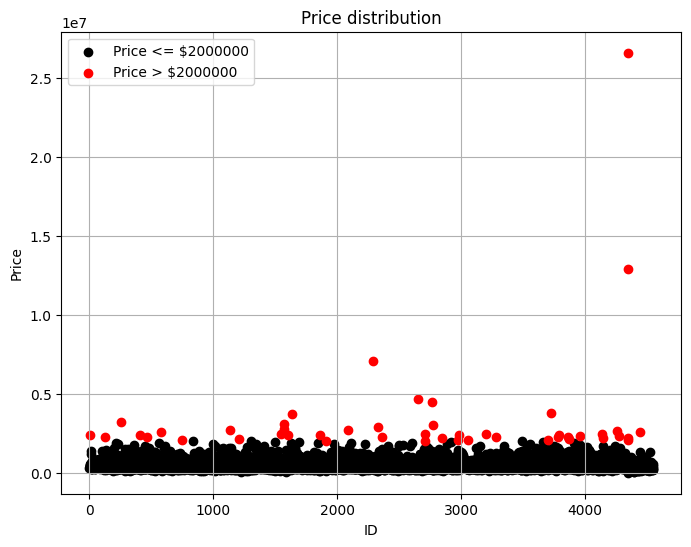

The number of houses above the $2000000 threshold: 47.


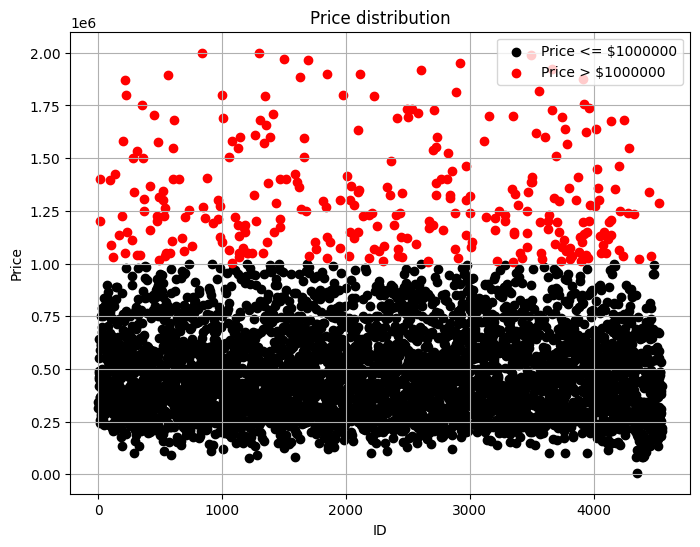

The number of houses above the $1000000 threshold: 291.


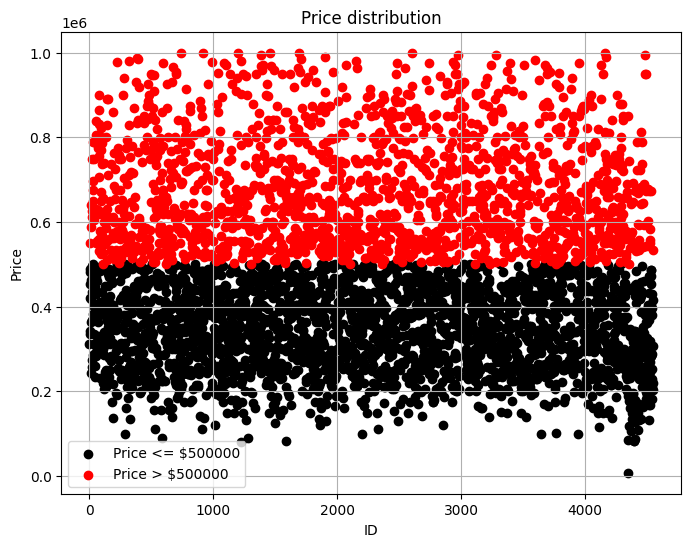

The number of houses above the $500000 threshold: 1663.


In [ ]:

def plot_price(data, threshold):
    plt.figure(figsize=(8, 6))
    plt.scatter(data['ID'][data['price'] <= threshold], 
                data['price'][data['price'] <= threshold], 
                color='black', label=f'Price <= ${threshold}')
    
    plt.scatter(data['ID'][data['price'] > threshold], 
                data['price'][data['price'] > threshold], 
                color='red', label=f'Price > ${threshold}')
    
    plt.title('Price distribution')
    plt.xlabel('ID')
    plt.ylabel('Price')
    plt.grid(True)
    plt.legend()
    plt.show()

    above_threshold = len(data['price'][data['price'] > threshold])
    print(f"The number of houses above the ${threshold} threshold: {above_threshold}.")

thresholds = [2000000, 1000000, 500000]
for threshold in thresholds:
    plot_price(data_with_id, threshold)
    # Exclude the outliers
    data_with_id = data_with_id[data_with_id['price'] <= threshold]


From the above plots it seems like $1000000 might be a good threshold for the properties we will consider so there is not so high of a difference in values and most fall into the <$1000000 threshold.

In [ ]:
#removing values from the original set <$1000000
original_data = original_data[original_data['price'] <= 1000000]

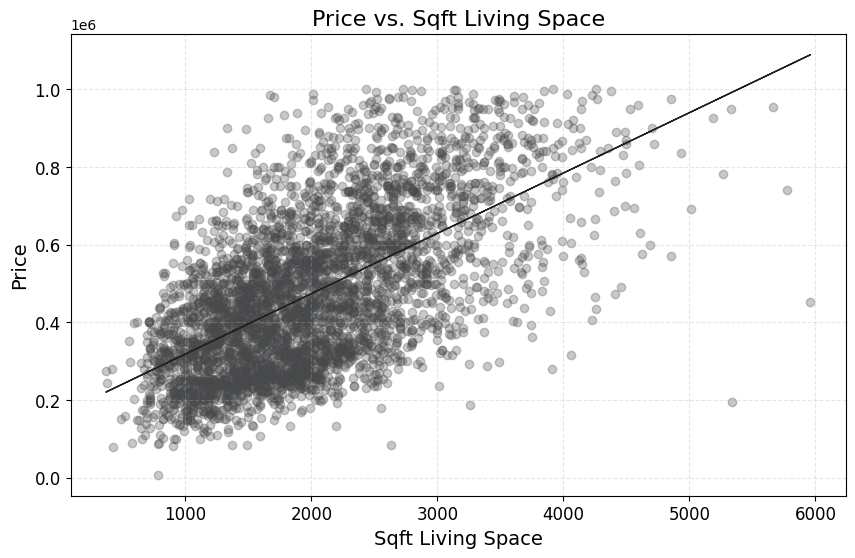

In [ ]:
#how the price changes with the squarefoot of living space
X = original_data['sqft_living'].values.reshape(-1, 1)
y = original_data['price'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(original_data['sqft_living'], original_data['price'], alpha=0.3, color='#48494b')
plt.plot(original_data['sqft_living'], y_pred, color='#222021', linewidth=1, label='Linear Regression')
plt.title('Price vs. Sqft Living Space', fontsize=16)
plt.xlabel('Sqft Living Space', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

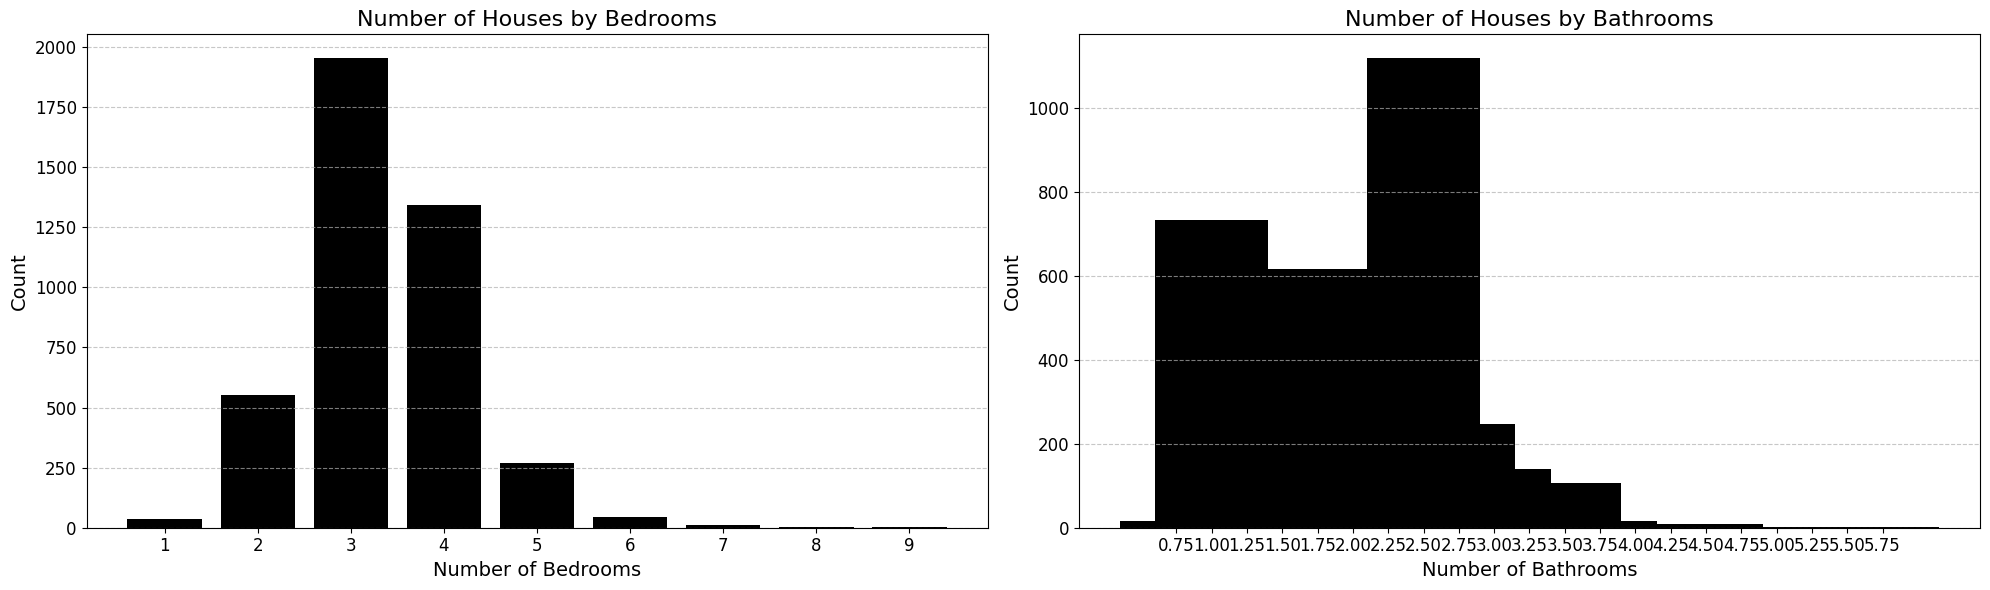

In [ ]:
bedroom_counts = original_data['bedrooms'].value_counts().sort_index()
bathroom_counts = original_data['bathrooms'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(20, 6))

# Plot for bedrooms
plt.subplot(1, 2, 1)
plt.bar(bedroom_counts.index, bedroom_counts.values, color='black')
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of Houses by Bedrooms', fontsize=16)
plt.xticks(bedroom_counts.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for bathrooms
plt.subplot(1, 2, 2)
plt.bar(bathroom_counts.index, bathroom_counts.values, color='black')
plt.xlabel('Number of Bathrooms', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of Houses by Bathrooms', fontsize=16)
plt.xticks(bathroom_counts.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Checking the housing prices, how many are above or below average.

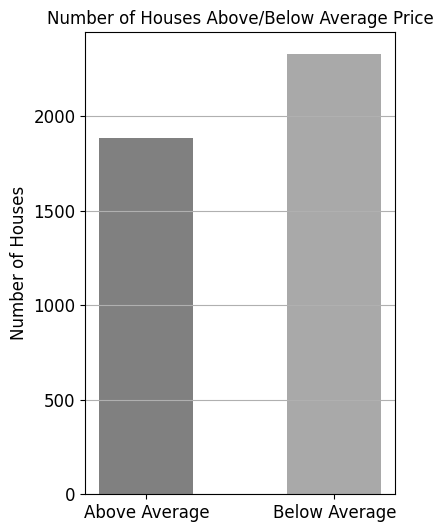

In [ ]:
average_price = original_data['price'].mean()

price_counts = original_data.groupby(original_data['price'] < average_price).size().reset_index(name='count')
price_counts['price_category'] = price_counts['price'].apply(lambda x: 'Below Average' if x else 'Above Average')

plt.figure(figsize=(4,6))
plt.bar(price_counts['price_category'], price_counts['count'], color=['grey', 'darkgrey'],width=0.5)
plt.ylabel('Number of Houses', fontsize=12)
plt.title('Number of Houses Above/Below Average Price', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=1)
plt.show()

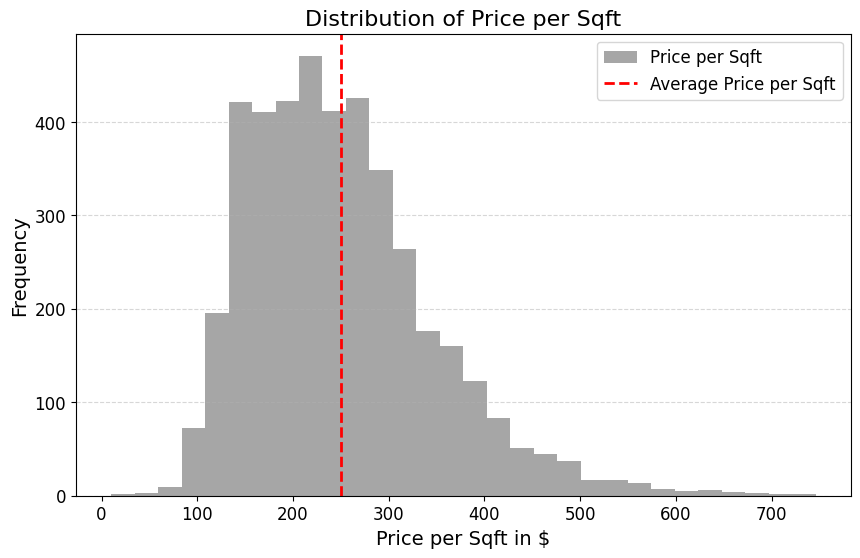

In [ ]:
original_data['price_per_sqft'] = original_data['price'] / original_data['sqft_living']


plt.figure(figsize=(10, 6))

# Plot the distribution of price per square foot
plt.hist(original_data['price_per_sqft'], bins=30, color='grey', alpha=0.7, label='Price per Sqft')
avg_price_per_sqft = original_data['price_per_sqft'].mean()
plt.axvline(x=avg_price_per_sqft, color='red', linestyle='--', linewidth=2, label='Average Price per Sqft')
plt.xlabel('Price per Sqft in $', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Price per Sqft', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

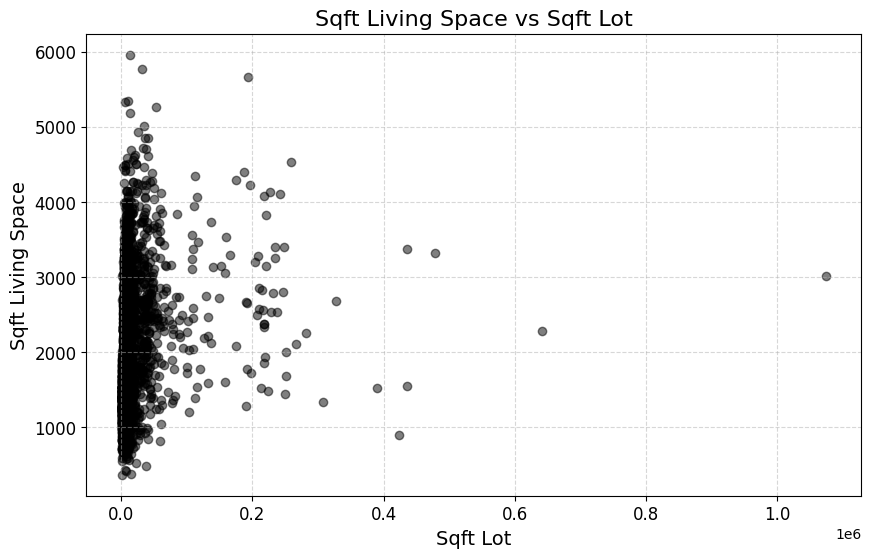

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(original_data['sqft_lot'], original_data['sqft_living'], alpha=0.5, color='black')

plt.ylabel('Sqft Living Space', fontsize=14)
plt.xlabel('Sqft Lot', fontsize=14)
plt.title('Sqft Living Space vs Sqft Lot', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

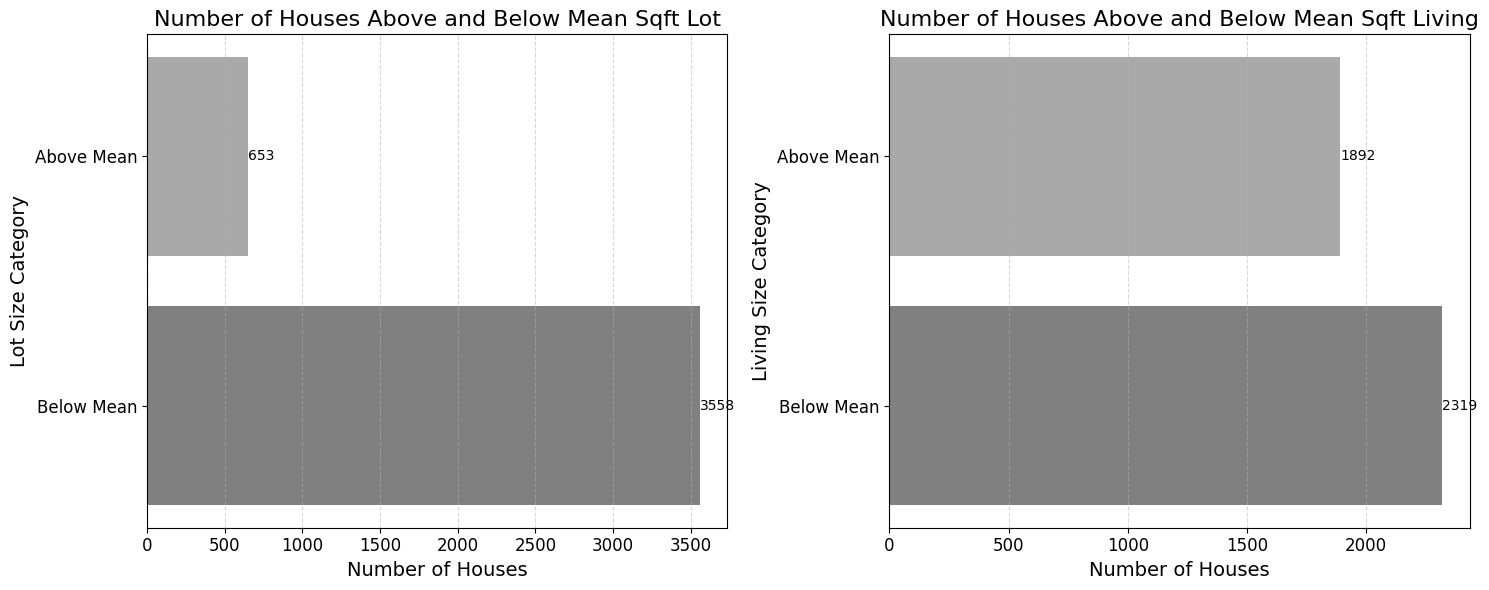

In [ ]:
mean_sqft_lot = original_data['sqft_lot'].mean()
mean_sqft_living = original_data['sqft_living'].mean()

original_data['lot_size_category'] = original_data['sqft_lot'].apply(lambda x: 'Above Mean' if x > mean_sqft_lot else 'Below Mean')
original_data['living_size_category'] = original_data['sqft_living'].apply(lambda x: 'Above Mean' if x > mean_sqft_living else 'Below Mean')
lot_size_counts = original_data['lot_size_category'].value_counts()
living_size_counts = original_data['living_size_category'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].barh(lot_size_counts.index, lot_size_counts.values, color=['grey', 'darkgrey'])
axs[0].set_xlabel('Number of Houses', fontsize=14)
axs[0].set_ylabel('Lot Size Category', fontsize=14)
axs[0].set_title('Number of Houses Above and Below Mean Sqft Lot', fontsize=16)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].grid(axis='x', linestyle='--', alpha=0.5)

for i, value in enumerate(lot_size_counts.values):
    axs[0].text(value, i, f'{value}', ha='left', va='center')

axs[1].barh(living_size_counts.index, living_size_counts.values, color=['grey', 'darkgrey'])
axs[1].set_xlabel('Number of Houses', fontsize=14)
axs[1].set_ylabel('Living Size Category', fontsize=14)
axs[1].set_title('Number of Houses Above and Below Mean Sqft Living', fontsize=16)
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].grid(axis='x', linestyle='--', alpha=0.5)

for i, value in enumerate(living_size_counts.values):
    axs[1].text(value, i, f'{value}', ha='left', va='center')

plt.tight_layout()
plt.show()


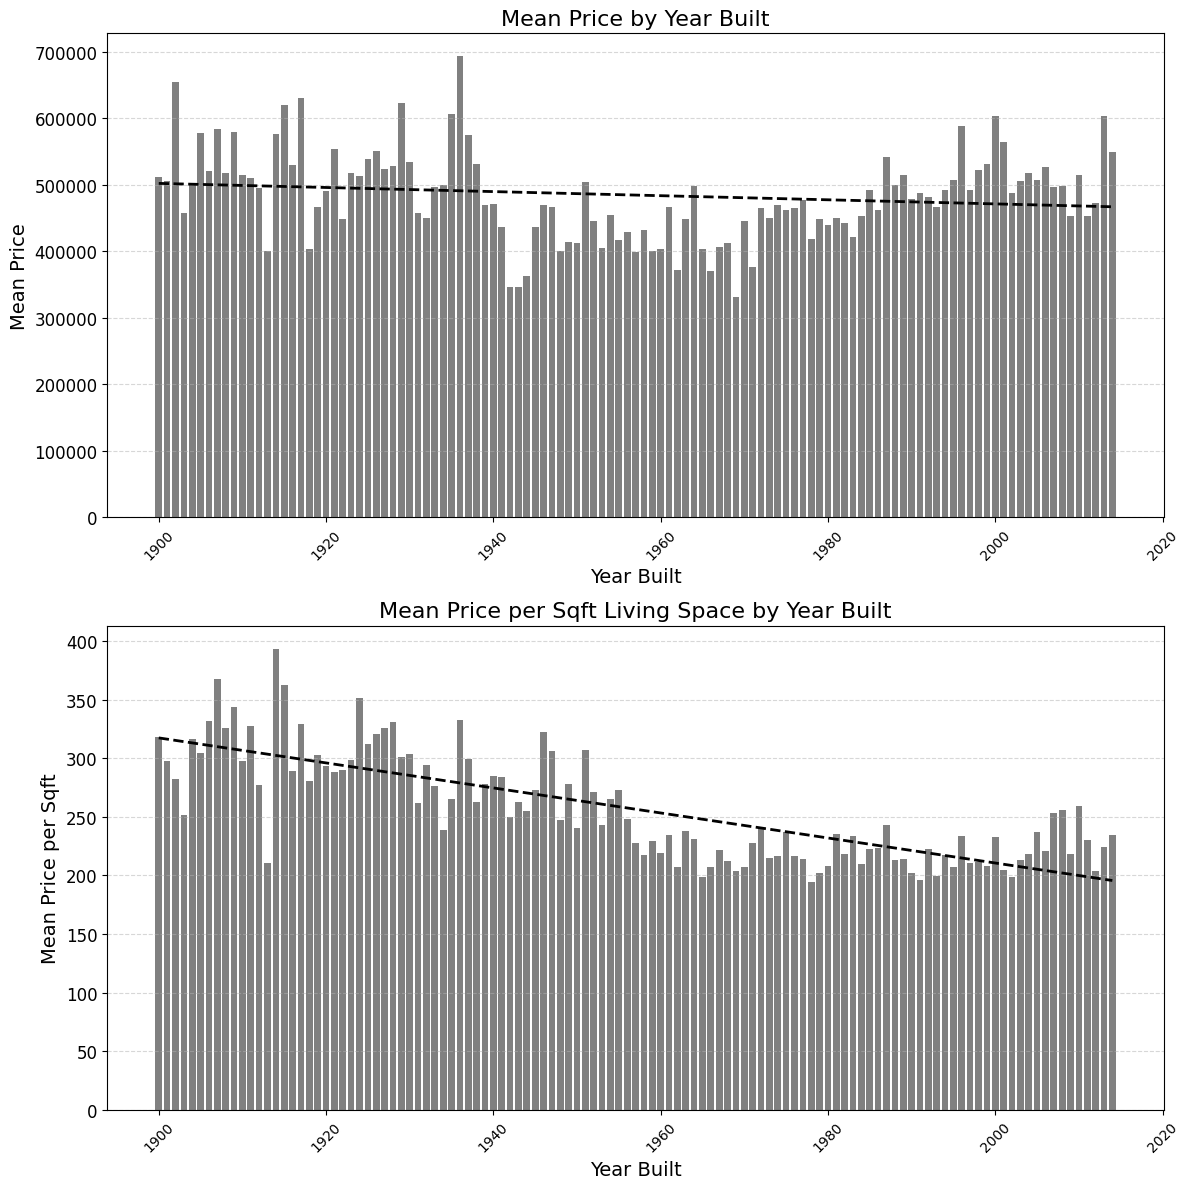

In [ ]:

mean_prices = original_data.groupby('yr_built').agg({'price': 'mean', 'sqft_living': 'mean'})
mean_prices['price_per_sqft'] = mean_prices['price'] / mean_prices['sqft_living']

fig, axs = plt.subplots(2, 1, figsize=(12, 12))

axs[0].bar(mean_prices.index, mean_prices['price'], color='grey')
axs[0].set_xlabel('Year Built', fontsize=14)
axs[0].set_ylabel('Mean Price', fontsize=14)
axs[0].set_title('Mean Price by Year Built', fontsize=16)
axs[0].tick_params(axis='x', rotation=45, labelsize=10)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.5)

X_price = np.array(mean_prices.index).reshape(-1, 1)
y_price = mean_prices['price'].values.reshape(-1, 1)
model_price = LinearRegression()
model_price.fit(X_price, y_price)
trend_line_price = model_price.predict(X_price)
axs[0].plot(mean_prices.index, trend_line_price, color='black', linestyle='--', linewidth=2)

axs[1].bar(mean_prices.index, mean_prices['price_per_sqft'], color='grey')
axs[1].set_xlabel('Year Built', fontsize=14)
axs[1].set_ylabel('Mean Price per Sqft', fontsize=14)
axs[1].set_title('Mean Price per Sqft Living Space by Year Built', fontsize=16)
axs[1].tick_params(axis='x', rotation=45, labelsize=10)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].grid(axis='y', linestyle='--', alpha=0.5)

y_price_per_sqft = mean_prices['price_per_sqft'].values.reshape(-1, 1)
model_price_per_sqft = LinearRegression()
model_price_per_sqft.fit(X_price, y_price_per_sqft)
trend_line_price_per_sqft = model_price_per_sqft.predict(X_price)
axs[1].plot(mean_prices.index, trend_line_price_per_sqft, color='black', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()


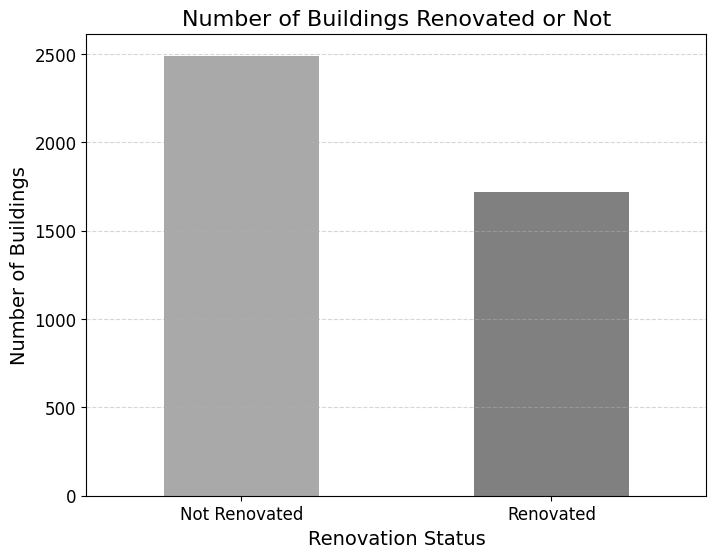

In [ ]:
renovated_counts = original_data['yr_renovated'].apply(lambda x: 'Renovated' if x > 0 else 'Not Renovated').value_counts()

plt.figure(figsize=(8, 6))

renovated_counts.plot(kind='bar', color=['darkgrey', 'grey'])

plt.xlabel('Renovation Status', fontsize=14)
plt.ylabel('Number of Buildings', fontsize=14)
plt.title('Number of Buildings Renovated or Not', fontsize=16)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

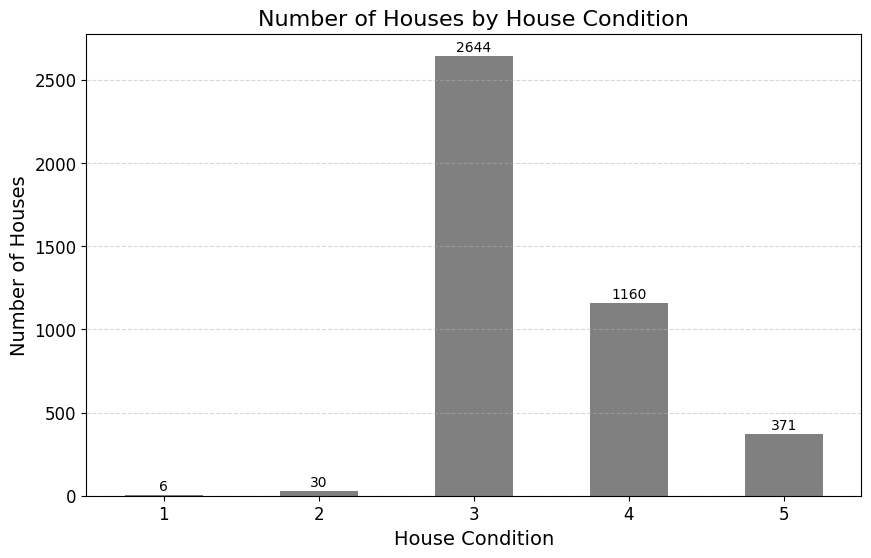

In [ ]:
condition_counts = original_data['condition'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

bars = condition_counts.plot(kind='bar', color='grey')

plt.xlabel('House Condition', fontsize=14)
plt.ylabel('Number of Houses', fontsize=14)
plt.title('Number of Houses by House Condition', fontsize=16)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
for bar, count in zip(bars.patches, condition_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, str(count), 
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()

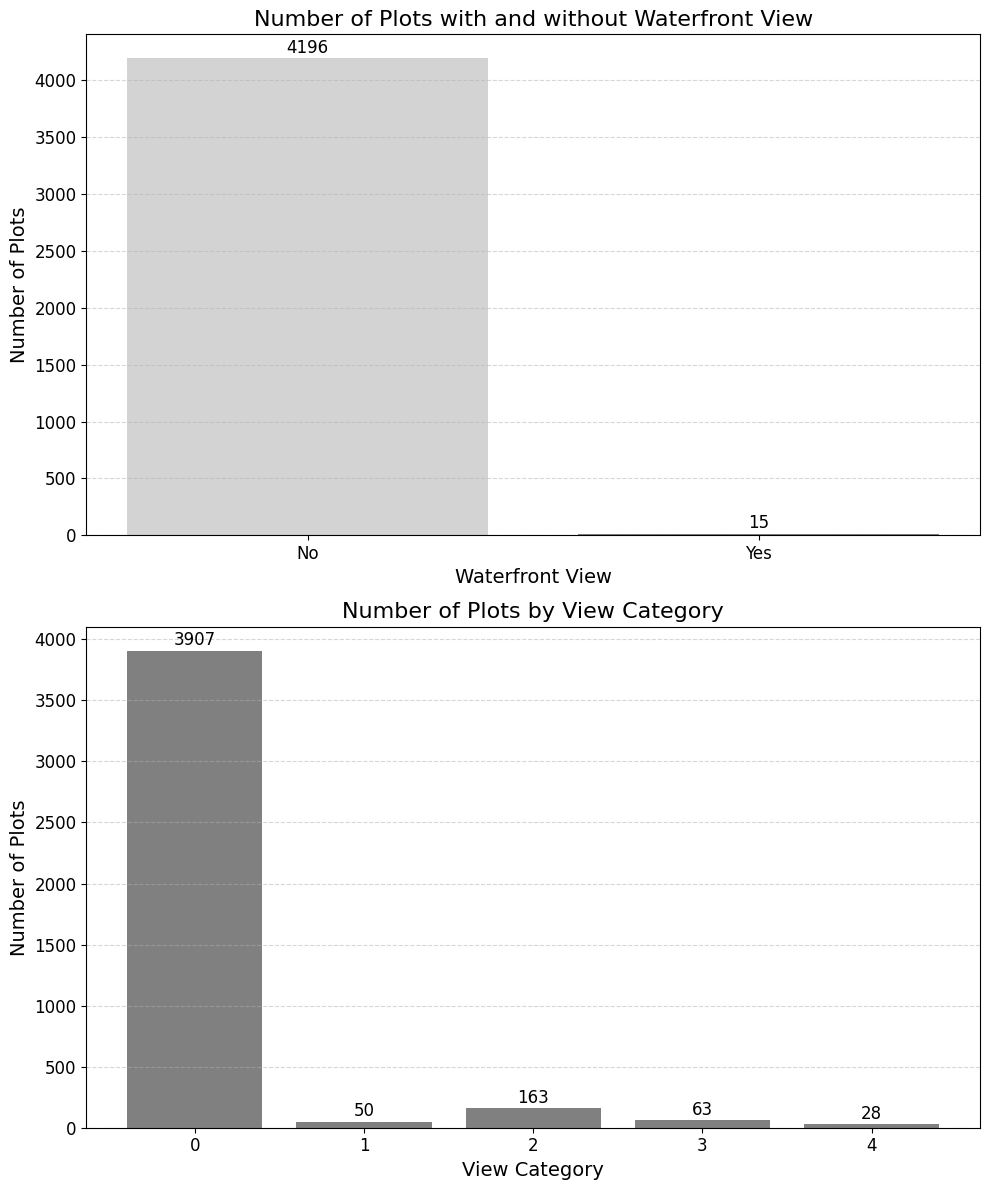

In [ ]:
waterfront_counts = original_data['waterfront'].value_counts()

view_counts = original_data['view'].value_counts().sort_index()

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

axs[0].bar(waterfront_counts.index.map({0: 'No', 1: 'Yes'}), waterfront_counts.values, color=['lightgrey', 'grey'])

axs[0].set_xlabel('Waterfront View', fontsize=14)
axs[0].set_ylabel('Number of Plots', fontsize=14)
axs[0].set_title('Number of Plots with and without Waterfront View', fontsize=16)
axs[0].tick_params(axis='x', labelrotation=0, labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.5)

for bar, count in zip(waterfront_counts.index.map({0: 'No', 1: 'Yes'}), waterfront_counts):
    axs[0].text(bar, count + 10, str(count), ha='center', va='bottom', fontsize=12, color='black')

axs[1].bar(view_counts.index, view_counts.values, color='grey')

axs[1].set_xlabel('View Category', fontsize=14)
axs[1].set_ylabel('Number of Plots', fontsize=14)
axs[1].set_title('Number of Plots by View Category', fontsize=16)
axs[1].tick_params(axis='x', labelrotation=0, labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].grid(axis='y', linestyle='--', alpha=0.5)

for bar, count in zip(view_counts.index, view_counts):
    axs[1].text(bar, count + 10, str(count), ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

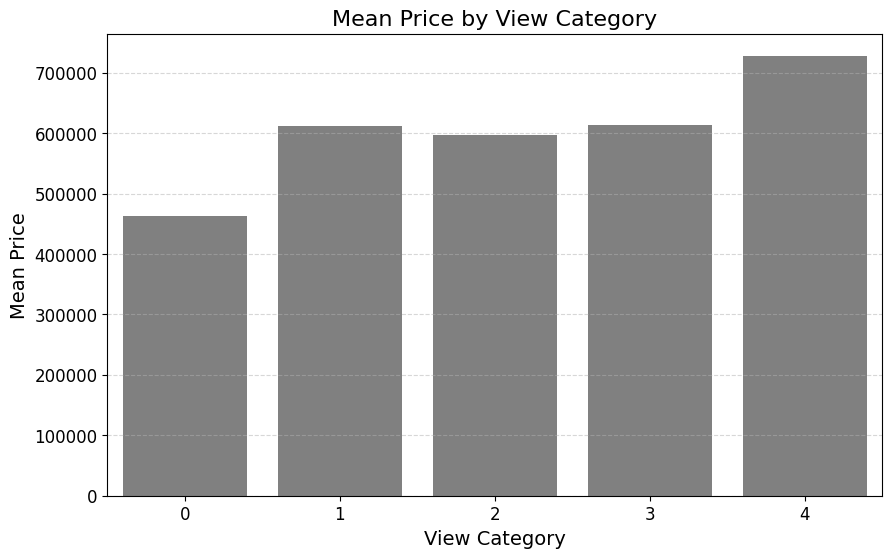

In [ ]:
view_price_mean = original_data.groupby('view')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(data=view_price_mean, x='view', y='price',color='grey')

plt.xlabel('View Category', fontsize=14)
plt.ylabel('Mean Price', fontsize=14)
plt.title('Mean Price by View Category', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [ ]:
print("Final number of rows after data cleansing: {}".format(original_data.shape[0]))

Final number of rows after data cleansing: 4211
